In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
def crosscorr(x,y,l):
    L=[]
    for i in range(len(x)-l):
        s1=0
        s2=0
        s3=0
        for j in range(i,i+l):
            s1+=(x[j]-np.mean(x[i:i+l]))*(y[j]-np.mean(y[i:i+l]))
            s2+=(x[j]-np.mean(x[i:i+l]))**2
            s3+=(y[j]-np.mean(y[i:i+l]))**2
        L.append(s1/((s3**0.5)*(s2**0.5)))
    return L

In [4]:
birth = pd.read_csv('./birth.csv',encoding='cp949')
cpi = pd.read_csv('./cpi.csv',encoding='cp949')
holi = pd.read_csv('./holiday.csv',encoding='cp949')

In [5]:
birth.head()

,시점,출생아수(명),자연증가건수(명),조출생률(천명당),자연증가율(천명당),합계출산율(명),출생성비(명)
0,1970,1006645,748056,31.2,23.2,4.53,109.5
1,1971,1024773,787245,31.2,23.9,4.54,109.0
2,1972,952780,742709,28.4,22.2,4.12,109.5
3,1973,965521,698061,28.3,20.5,4.07,104.6
4,1974,922823,674016,26.6,19.4,3.77,109.4


In [7]:
cpi.head()

,시점,전국
0,1965,2.611
1,1966,2.905
2,1967,3.221
3,1968,3.568
4,1969,4.010


In [8]:
holi.head()

,시점,계,부,모
0,2012,15.2,0.3,49.3
1,2013,16.4,0.4,53.0
2,2014,17.5,0.5,55.9
3,2015,18.6,0.6,58.0
4,2016,19.3,0.9,59.2


In [9]:
len(cpi) == len(birth)

False

In [10]:
print("length of cpi :",len(cpi))
print("length of birth :",len(birth))

length of cpi : 58
length of birth : 53


In [14]:
cpi2 = cpi[5:]

In [33]:
cpi_a = cpi2['전국'].tolist()
birth_a = birth.iloc[:,5].tolist()

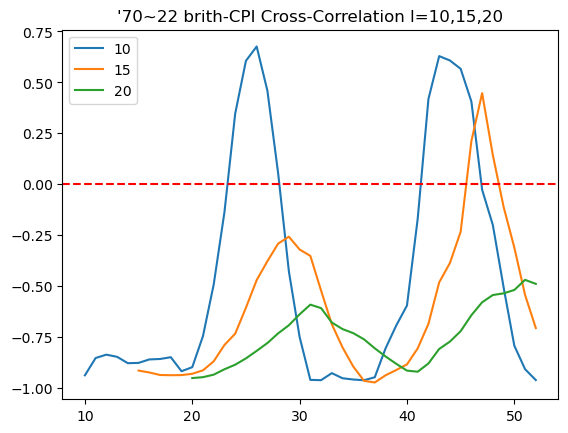

In [41]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(cpi_a,birth_a,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('\'70~22 brith-CPI Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(cpi_a,birth_a,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

In [7]:
job=pd.read_csv('./job.csv',encoding='cp949')
job.head()

,성별,시점,계,중졸이하,고졸,대졸이상
0,계,1965,8112,-,-,-
1,계,1966,8325,-,-,-
2,계,1967,8624,-,-,-
3,계,1968,9061,-,-,-
4,계,1969,9285,-,-,-


In [8]:
total_job=job[(job['성별']=='계')]
woman_job=job[(job['성별']=='여자')]
man_job=job[(job['성별']=='남자')]

In [55]:
t1=total_job[(total_job.시점 >= 1970)].계.tolist()
w1=woman_job[(woman_job.시점 >= 1970)].계.tolist()
m1=man_job[(man_job.시점 >= 1970)].계.tolist()

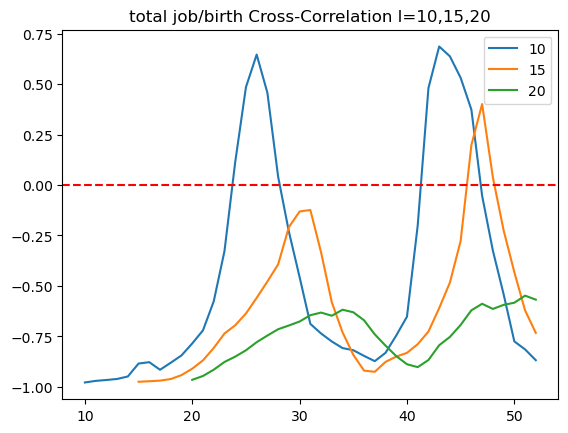

In [57]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(t1,birth_a,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('total job/birth Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

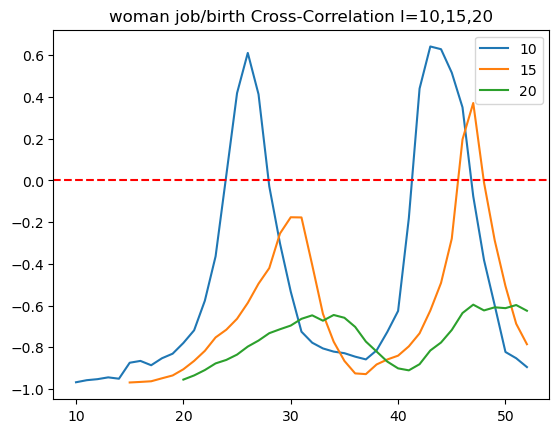

In [58]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(w1,birth_a,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('woman job/birth Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

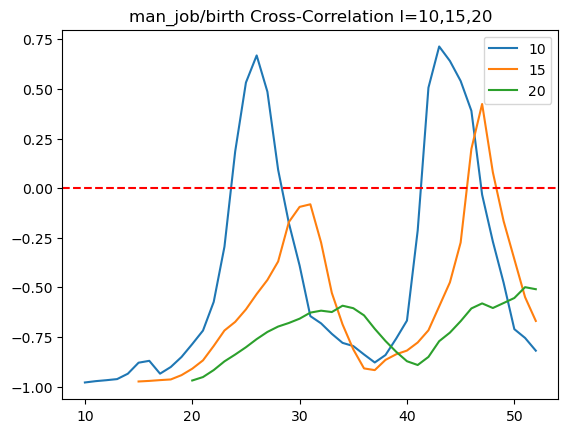

In [59]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(m1,birth_a,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('man_job/birth Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

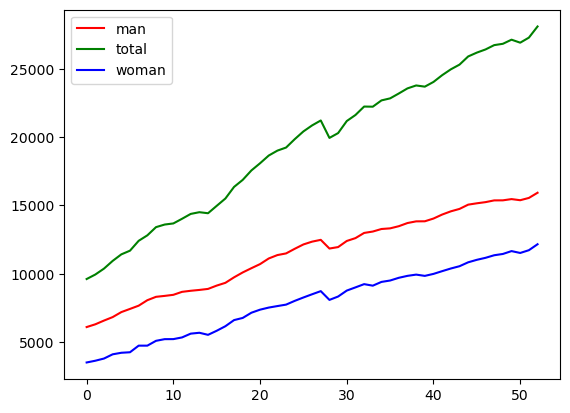

In [65]:
plt.plot(m1,color='red',label='man')
plt.plot(t1,color='green',label='total')
plt.plot(w1,color='blue',label='woman')
plt.legend()
plt.show()

In [89]:
t2=list(map(int,total_job[(total_job.시점>=1980)].중졸이하.tolist()))
t3=list(map(int,total_job[(total_job.시점>=1980)].고졸.tolist()))
t4=list(map(int,total_job[(total_job.시점>=1980)].대졸이상.tolist()))
birth_b=birth.iloc[10:,5].tolist()

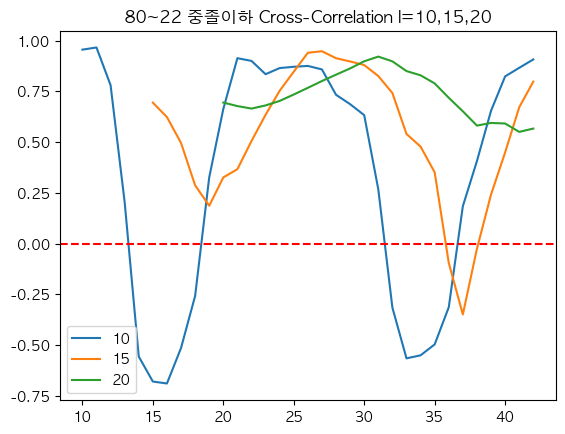

In [104]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(t2,birth_b,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('80~22 중졸이하 Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

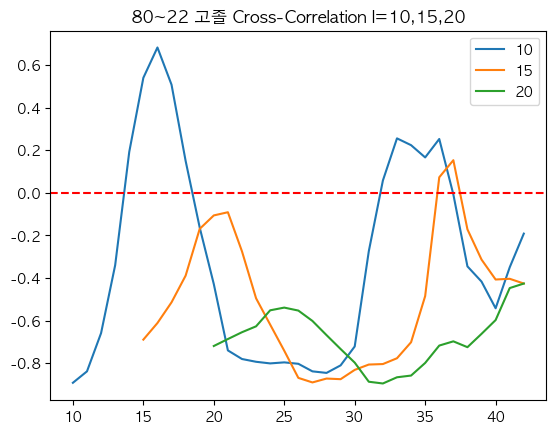

In [105]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(t3,birth_b,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('80~22 고졸 Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

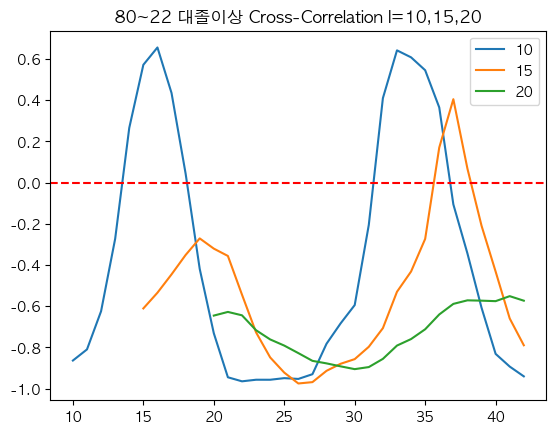

In [107]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(t4,birth_b,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('80~22 대졸이상 Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

In [10]:
t2=list(map(int,man_job[(man_job.시점>=1980)].중졸이하.tolist()))
t3=list(map(int,man_job[(man_job.시점>=1980)].고졸.tolist()))
t4=list(map(int,man_job[(man_job.시점>=1980)].대졸이상.tolist()))
birth_b=birth.iloc[10:,5].tolist()

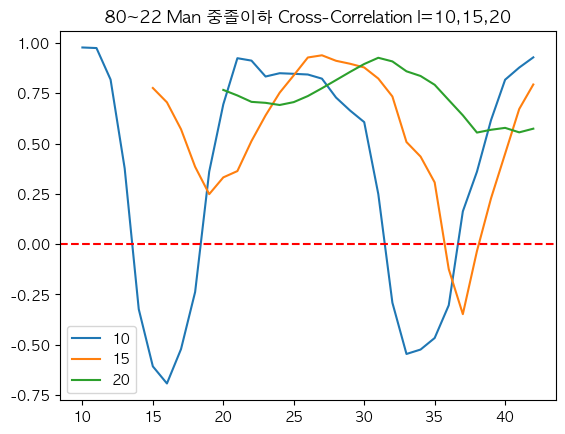

In [12]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(t2,birth_b,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('80~22 Man 중졸이하 Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

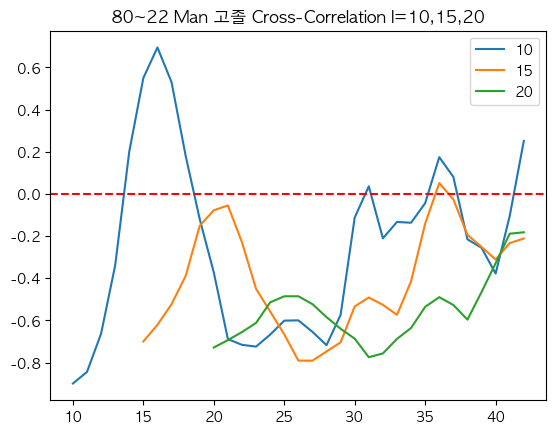

In [14]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(t3,birth_b,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('80~22 Man 고졸 Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

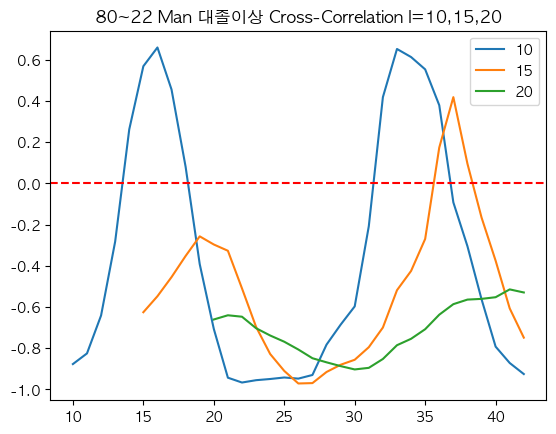

In [15]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(t4,birth_b,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('80~22 Man 대졸이상 Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

In [17]:
w2=list(map(int,woman_job[(woman_job.시점>=1980)].중졸이하.tolist()))
w3=list(map(int,woman_job[(woman_job.시점>=1980)].고졸.tolist()))
w4=list(map(int,woman_job[(woman_job.시점>=1980)].대졸이상.tolist()))
birth_b=birth.iloc[10:,5].tolist()

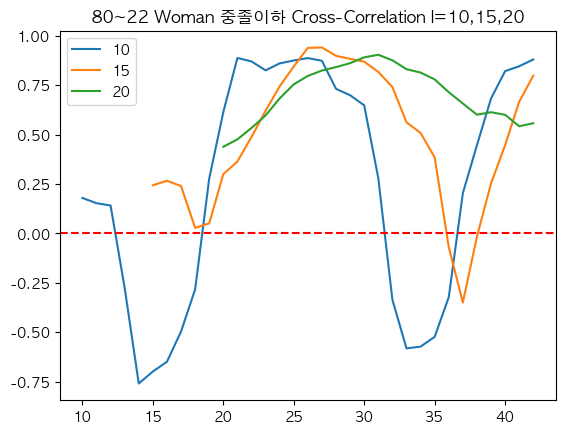

In [18]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(w2,birth_b,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('80~22 Woman 중졸이하 Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

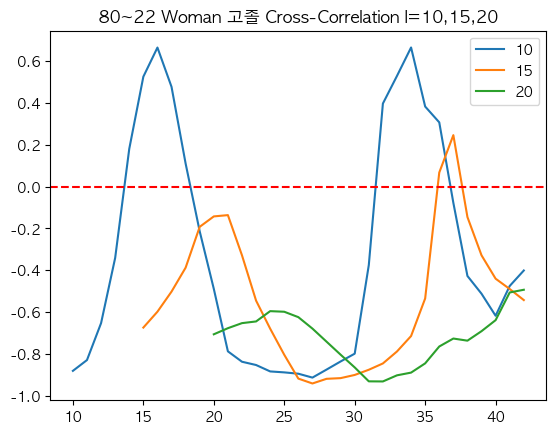

In [20]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(w3,birth_b,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('80~22 Woman 고졸 Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()

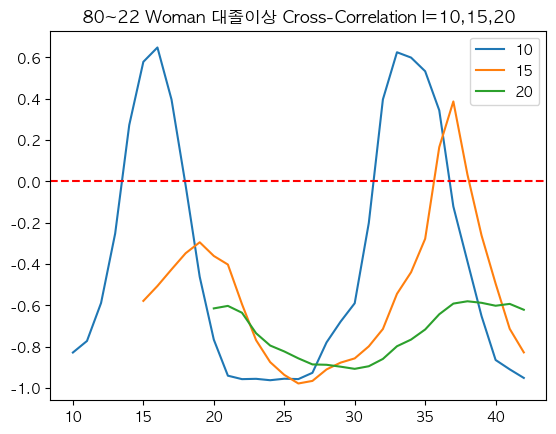

In [21]:
ll=[10,15,20]
for i in range(len(ll)):
    a=crosscorr(w4,birth_b,ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('80~22 Woman 대졸이상 Cross-Correlation l=10,15,20')
plt.axhline(0,color='red',linestyle='--')
plt.show()